In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn

In [2]:
# load the datasets
xls = pd.ExcelFile('ethereum.xlsx')
eth = pd.read_excel(xls, 1)
spx = pd.read_csv('spx.csv')

In [3]:
eth.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,"Ethereum ETH/USD price history up until Mar 2,...",NaN
2,NaN,"Ethereum (ETH) price per day from June 7, 2022...",NaN
3,NaN,NaN,NaN
4,NaN,"Jun 7, 2022",1814.05
5,NaN,"Jun 8, 2022",1793.57
6,NaN,"Jun 9, 2022",1789.83
7,NaN,"Jun 10, 2022",1665.04
8,NaN,"Jun 11, 2022",1529.66
9,NaN,"Jun 12, 2022",1445.22


In [4]:
eth = eth.iloc[:, [1, 2]]  # Select the second and third columns
eth.columns = ['Date', 'Price']  # Rename columns


In [5]:
eth = eth.iloc[4:].reset_index(drop=True)

In [6]:
eth.head()

,Date,Price
0,"Jun 7, 2022",1814.05
1,"Jun 8, 2022",1793.57
2,"Jun 9, 2022",1789.83
3,"Jun 10, 2022",1665.04
4,"Jun 11, 2022",1529.66


In [7]:
spx.head()

,Date,Close/Last,Open,High,Low
0,02/28/2025,5954.50,5856.74,5959.40,5837.66
1,02/27/2025,5861.57,5981.88,5993.69,5858.78
2,02/26/2025,5956.06,5970.87,6009.82,5932.69
3,02/25/2025,5955.25,5982.73,5992.65,5908.49
4,02/24/2025,5983.25,6026.69,6043.65,5977.83


In [8]:
#Bringing the dater column into the same format as the other other dataset, and  made it into date object.
eth['Date']=pd.to_datetime(eth['Date'])
eth['Date'] =eth['Date'].dt.strftime('%m/%d/%Y')
eth['Date']=pd.to_datetime(eth['Date'])
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Price   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [9]:
spx['Date']=pd.to_datetime(spx['Date'])
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1256 non-null   datetime64[ns]
 1   Close/Last  1256 non-null   float64       
 2   Open        1256 non-null   float64       
 3   High        1256 non-null   float64       
 4   Low         1256 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 49.2 KB


In [10]:
spx=spx[spx['Date'] >= '07/07/2022']

In [11]:
merged=pd.merge(eth, spx, on='Date', how='inner')
merged

df = merged[['Date', 'Price', 'Close/Last']]
df.columns = ['date', 'eth_price', 'spx_price']
df.head()

,date,eth_price,spx_price
0,2022-07-07,1237.59,3902.62
1,2022-07-08,1222.51,3899.38
2,2022-07-11,1097.24,3854.43
3,2022-07-12,1038.19,3818.80
4,2022-07-13,1113.59,3801.78


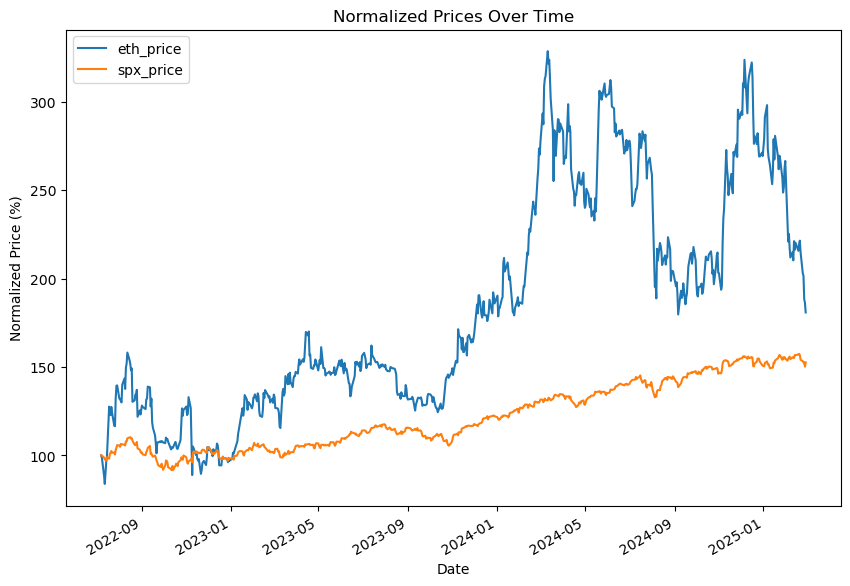

In [12]:
import matplotlib.pyplot as plt

df1 = df.copy()
# Set date as index
df1.set_index("date", inplace=True)

# Normalize data and plot
(df1/df1.iloc[0]*100).plot(figsize=(10,7))

plt.title("Normalized Prices Over Time")
plt.ylabel("Normalized Price (%)")
plt.xlabel("Date")
plt.show()


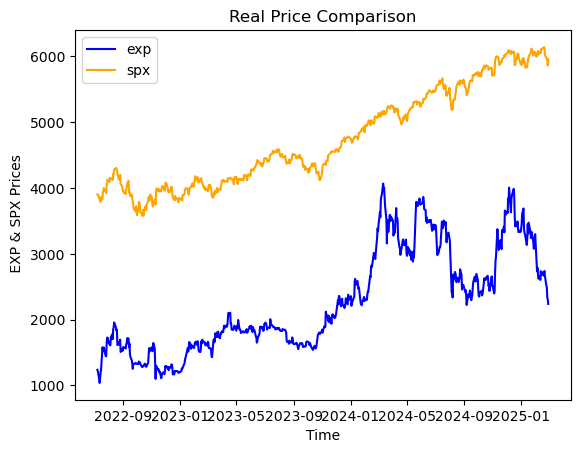

In [13]:
# Creating a graph with all the columns.
plt.plot(df['date'], df['eth_price'], label='exp', color='blue')
plt.plot(df['date'], df['spx_price'], label='spx', color='orange')
plt.title('Real Price Comparison')
plt.xlabel('Time')
plt.ylabel(' EXP & SPX Prices')
plt.legend()
plt.show()

In [14]:
def calculate_roi(profit, investment_cost):
    roi = ((profit - investment_cost) / investment_cost) * 100
    return roi

# Example Usage
profit = 15000  # Total return from investment
investment_cost = 10000  # Initial investment cost

roi = calculate_roi(profit, investment_cost)
print(f"Return on Investment (RoI): {roi:.2f}%")

Return on Investment (RoI): 50.00%


In [15]:
import pandas as pd

# Define investment and final dates
investment_date = "2022-07-07"
final_date = "2025-02-28"

# Extract prices for the given dates
if investment_date in df1.index and final_date in df1.index:
    investment_price = df1.loc[investment_date]
    final_price = df1.loc[final_date]

    # Compute RoI
    roi = ((final_price - investment_price) / investment_price) * 100
    print("Return on Investment (RoI):")
    print(roi)
else:
    print("One of the required dates is missing in the DataFrame.")


Return on Investment (RoI):
eth_price    80.828061
spx_price    52.576987
dtype: float64


In [16]:
df1.head()

,eth_price,spx_price
date,,
2022-07-07,1237.59,3902.62
2022-07-08,1222.51,3899.38
2022-07-11,1097.24,3854.43
2022-07-12,1038.19,3818.80
2022-07-13,1113.59,3801.78


In [17]:
df.head()

,date,eth_price,spx_price
0,2022-07-07,1237.59,3902.62
1,2022-07-08,1222.51,3899.38
2,2022-07-11,1097.24,3854.43
3,2022-07-12,1038.19,3818.80
4,2022-07-13,1113.59,3801.78


In [18]:
import pandas as pd

# Generate semester start dates (Jan 1, July 1 of each year)
semester_dates = pd.date_range(start=df1.index.min(), end=df1.index.max(), freq="6MS")

# Store RoI results
roi_results = {}

for i in range(len(semester_dates) - 1):
    start_date = semester_dates[i]
    end_date = semester_dates[i + 1]

    # Find closest available dates in df1
    if start_date in df1.index and end_date in df1.index:
        start_price = df1.loc[start_date]
        end_price = df1.loc[end_date]

        # Compute RoI
        roi = ((end_price - start_price) / start_price) * 100
        roi_results[f"{start_date.date()} to {end_date.date()}"] = roi
    else:
        print(f"Skipping period {start_date.date()} to {end_date.date()} (dates missing)")

# Convert to DataFrame for better visualization
roi_df = pd.DataFrame(roi_results).T
print(roi_df)


Skipping period 2024-08-01 to 2025-02-01 (dates missing)
                          eth_price  spx_price
2022-08-01 to 2023-02-01   0.403009   0.014082
2023-02-01 to 2023-08-01  14.009100  11.106984
2023-08-01 to 2024-02-01  23.081115   7.198589
2024-02-01 to 2024-08-01  38.967454  11.016491


In [44]:
# Generate semester start dates (Jan 1, July 1) until the latest available date
semester_dates = pd.date_range(start=df1.index.min(), end=df1.index.max(), freq="6MS")

# Ensure the last date aligns with the latest available date in df1
semester_dates = list(semester_dates)
if semester_dates[-1] != df1.index.max():
    semester_dates[-1] = df1.index.max()  # Replace last intermediate date with actual last date

# Store RoI results
roi_results = {}

for i in range(len(semester_dates) - 1):
    start_date = semester_dates[i]
    end_date = semester_dates[i + 1]

    # Find closest available start and end dates in df1
    start_date = df1.index[df1.index.get_indexer([start_date], method="nearest")[0]]
    end_date = df1.index[df1.index.get_indexer([end_date], method="nearest")[0]]

    start_price = df1.loc[start_date]
    end_price = df1.loc[end_date]

    # Compute RoI
    roi = ((end_price - start_price) / start_price) * 100
    roi_results[f"{start_date.date()} to {end_date.date()}"] = roi

# Convert to DataFrame for better visualization
roi_df = pd.DataFrame(roi_results).T
print(roi_df)

                          eth_price  spx_price
2022-08-01 to 2023-02-01   0.403009   0.014082
2023-02-01 to 2023-08-01  14.009100  11.106984
2023-08-01 to 2024-02-01  23.081115   7.198589
2024-02-01 to 2024-08-01  38.967454  11.016491
2024-08-01 to 2025-02-28 -30.099389   9.323478


In [48]:
df_norm = df1.apply(lambda x: np.log(x) - np.log(x[0]))
df_norm.head()

/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_36867/3226110118.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_norm = df1.apply(lambda x: np.log(x) - np.log(x[0]))


,eth_price,spx_price
date,,
2022-07-07,0.000000,0.000000
2022-07-08,-0.012260,-0.000831
2022-07-11,-0.120368,-0.012425
2022-07-12,-0.175687,-0.021712
2022-07-13,-0.105577,-0.026179


In [54]:
#compute log returns with pandas using the shift method
lnret = np.log(df1)-np.log(df1.shift(1))
lnret.head()

,eth_price,spx_price
date,,
2022-07-07,NaN,NaN
2022-07-08,-0.012260,-0.000831
2022-07-11,-0.108108,-0.011594
2022-07-12,-0.055319,-0.009287
2022-07-13,0.070110,-0.004467


In [56]:
lnret.dropna(inplace=True)

In [58]:
import numpy as np

# Get stock tickers (column names)
stocks = df1.columns  

# Define number of standard deviations for outlier detection
nsd = 5  

# Loop through each stock and detect outliers
for stock in stocks:
    mu = lnret[stock].mean()  # Mean log return
    sd = lnret[stock].std()   # Standard deviation of log return

    # Identify outliers beyond 5 standard deviations
    NOUT = lnret[(lnret[stock] < mu - nsd * sd) | (lnret[stock] > mu + nsd * sd)]

    print(f"Outliers for stock '{stock}' = {len(NOUT)}")


Outliers for stock 'eth_price' = 2
Outliers for stock 'spx_price' = 1


In [66]:
# value at risk with confidence level conf
conf = 0.01
for stock in stocks:
    val_at_risk = lnret[stock].quantile(conf)
    print("The VaR for stock with ticker " + stock + " is = " + str(val_at_risk))

The VaR for stock with ticker eth_price is = -0.10808490042845946
The VaR for stock with ticker spx_price is = -0.024424573669356332


In [72]:
lnret['eth_price'].describe()

count    664.000000
mean       0.000892
std        0.040954
min       -0.211324
25%       -0.019241
50%       -0.000205
75%        0.020038
max        0.247059
Name: eth_price, dtype: float64

In [74]:
lnret['spx_price'].describe()

count    664.000000
mean       0.000636
std        0.009694
min       -0.044199
25%       -0.004690
50%        0.000584
75%        0.006193
max        0.053953
Name: spx_price, dtype: float64

In [86]:
lnret.corr()

,eth_price,spx_price
eth_price,1.000000,0.353464
spx_price,0.353464,1.000000


In [84]:
lnret.cov()*252 # variance covariance matrix (annualized)

,eth_price,spx_price
eth_price,0.422655,0.035361
spx_price,0.035361,0.023680


In [100]:
%%time
prets = [] # mean return
pvols = [] # standard deviation
pweights = [] # weights
pvar5 = [] # VaR 5%
conf = 0.05
for p in range(10000):
    weights = np.random.random(2)
    weights /= np.sum(weights)
    prets.append(np.sum(lnret.mean()*weights)*252)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(lnret.cov()*252,weights))))
    pweights.append(weights)
    pvar5.append(np.quantile(np.dot(lnret.dropna(), weights.T), conf)) # take quantile of portfolio using lnret

prets = np.array(prets)
pvols = np.array(pvols)
pvar5 = np.array(pvar5)
    

CPU times: user 3.13 s, sys: 11.9 ms, total: 3.14 s
Wall time: 3.14 s


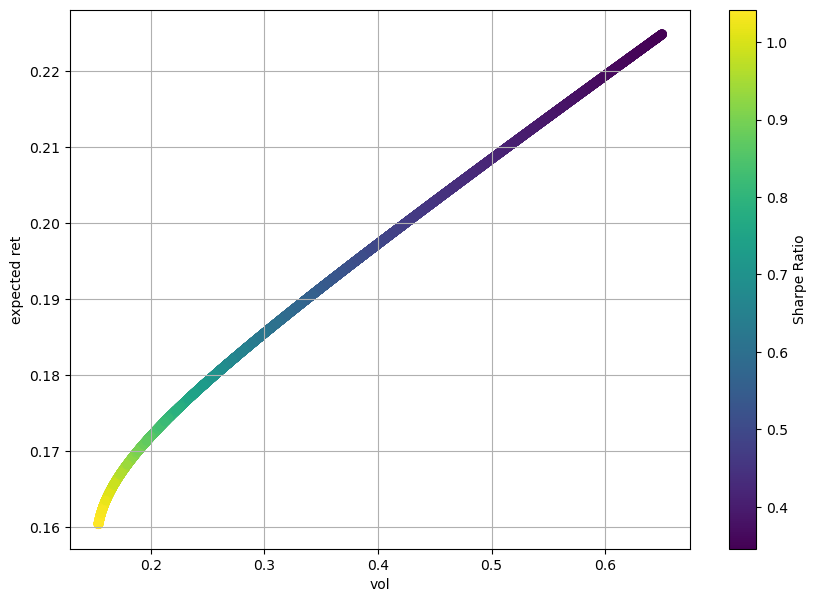

In [104]:
# for the computation, I assume a risk-free rate of 0 in Sharpe ratio

plt.figure(figsize=(10,7))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.grid(True)
plt.xlabel('vol')
plt.ylabel('expected ret')
plt.colorbar(label='Sharpe Ratio')